In [1]:
import analysis
import test_features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import subplots,scatter
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.externals import joblib
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score
#from yellowbrick.features import RFECV
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost

C:\Users\Richard\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
matplotlib.interactive(True)

masses = pd.read_csv('../../sweedler_lab/Data/mass_cer_raw.csv',header=None)
intens_df = pd.read_csv('../../sweedler_lab/Data/intensity_raw_sims.csv',header=None)
groups = pd.read_csv('../../sweedler_lab/Data/groups.csv',header=None)

features = masses.values[0]

intens_df.columns = features
intens_df.insert(0,'type',groups.values[0])
intens_df = intens_df.sample(frac=1,random_state=19).reset_index(drop=True)

intens_mat_1 = intens_df[intens_df['type']==1].drop('type',axis=1).values
intens_mat_2 = intens_df[intens_df['type']==2].drop('type',axis=1).values
#%%
data = intens_df.drop('type',axis=1).values
labels = np.asarray(list(intens_df['type'].values))
labels = np.asarray(labels,str)
labels[labels=='1']='DRG'
labels[labels=='2']='CER'
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3,random_state=19)

data_dict = {'X_train':X_train,'X_test':X_test,'y_train':y_train,'y_test':y_test}

In [5]:
intens_df['type'] = labels

In [7]:
intens_df.to_pickle('SIMS.pkl')

In [3]:
O,F,P=analysis.rank_sum_test(intens_mat_1,intens_mat_2,features,1000)

(array([793., 145.,  89.,  97.,  91.,  94.,  69.,  81.,  63.,  60.,  62.,
         75.,  66.,  75.,  63.,  72.,  86.,  84.,  77.,  77., 122., 103.,
        148., 158., 184., 241., 289., 309., 368., 426.]),
 array([1.44323575e-226, 3.33333333e-002, 6.66666667e-002, 1.00000000e-001,
        1.33333333e-001, 1.66666667e-001, 2.00000000e-001, 2.33333333e-001,
        2.66666667e-001, 3.00000000e-001, 3.33333333e-001, 3.66666667e-001,
        4.00000000e-001, 4.33333333e-001, 4.66666667e-001, 5.00000000e-001,
        5.33333333e-001, 5.66666667e-001, 6.00000000e-001, 6.33333333e-001,
        6.66666667e-001, 7.00000000e-001, 7.33333333e-001, 7.66666667e-001,
        8.00000000e-001, 8.33333333e-001, 8.66666667e-001, 9.00000000e-001,
        9.33333333e-001, 9.66666667e-001, 1.00000000e+000]),
 <a list of 30 Patch objects>)

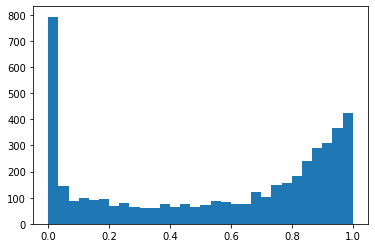

In [4]:
plt.hist(P,bins=30)

In [3]:
from treeinterpreter import treeinterpreter as ti

rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train,y_train)
prob = rf_model.predict_proba(X_test)

xgb_model = GradientBoostingClassifier(n_estimators=500,learning_rate=0.1)

xgb_model.fit(X_train,y_train)
xgb_model.fit(X_train,y_train)
prob_xgb = xgb_model.predict_proba(X_test)

#prediction,bias,contribution = ti.predict(rf_model,X_test)

In [6]:
report_dict_xgb_

{'CER': {'precision': 1.0,
  'recall': 0.9930313588850174,
  'f1-score': 0.9965034965034965,
  'support': 287},
 'DRG': {'precision': 0.9887640449438202,
  'recall': 1.0,
  'f1-score': 0.9943502824858756,
  'support': 176},
 'accuracy': 0.9956803455723542,
 'macro avg': {'precision': 0.9943820224719101,
  'recall': 0.9965156794425087,
  'f1-score': 0.995426889494686,
  'support': 463},
 'weighted avg': {'precision': 0.9957288810153615,
  'recall': 0.9956803455723542,
  'f1-score': 0.9956849961425864,
  'support': 463}}

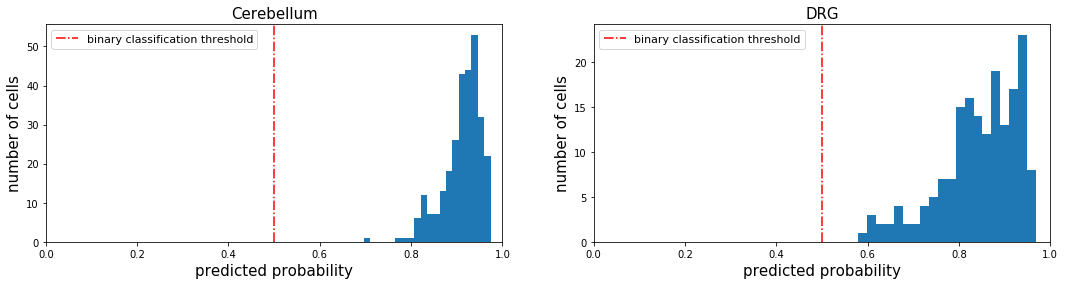

In [7]:
fig,axes = subplots(1,2,figsize=(18,4))
ax = axes.ravel()
ax[0].hist(prob[np.where(y_test=='CER')[0],0],bins=20)
ax[0].set_title('Cerebellum',fontsize=15)
ax[1].hist(prob[np.where(y_test=='DRG')[0],1],bins=20)
ax[1].set_title('DRG',fontsize=15)
ax[0].set_xlim([0,1])
ax[1].set_xlim([0,1])
ax[0].set_ylabel('number of cells',fontsize=15)
ax[1].set_ylabel('number of cells',fontsize=15)
ax[0].set_xlabel('predicted probability',fontsize=15)
ax[1].set_xlabel('predicted probability',fontsize=15)
ax[0].axvline(0.5,linestyle='-.',c='r',label='binary classification threshold')
ax[1].axvline(0.5,linestyle='-.',c='r',label='binary classification threshold')
ax[0].legend(fontsize=11)
ax[1].legend(fontsize=11)

In [77]:
def plot_featureImp_glob(model,features,feature_num_shown):
    
    feature_imp = model.feature_importances_
#     feature_imp_index_ranked = np.argsort(feature_imp)[::-1]
#     features_ranked = features[feature_imp_index_ranked]
    feature_imp = feature_imp/feature_imp.max()
    fig,ax = subplots(figsize=(6,4))
    ax.stem(features,feature_imp,markerfmt=' ')
    
    features_selected = []
    for i in range(feature_num_shown):
        ax.scatter(float(features_ranked[i]),feature_imp[feature_imp_index_ranked][i],color='k',s=10)
        ax.annotate(format(float(features_ranked[i]),'.4f'), xy=(float(features_ranked[i]),feature_imp[feature_imp_index_ranked][i]),fontsize=8)
        features_selected.append(float(features_ranked[i]))
    ax.set_ylabel('relative importance')
    ax.set_xlabel('m/z')
    return fig, features_selected

C:\Users\Richard\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(<Figure size 432x288 with 1 Axes>, [])

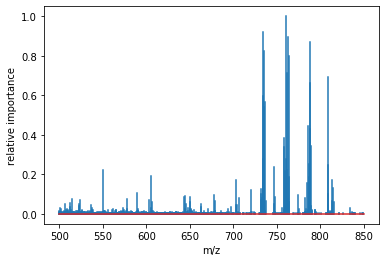

In [78]:
plot_featureImp_glob(rf_model,features,0)

In [4]:
import shap
from adjustText import adjust_text

def feature_contrib(model,X,features,feature_num_shown,if_summary):
    
    shap_explainer = shap.TreeExplainer(model)
    shap_vals = shap_explainer.shap_values(X)
    
    fig1,axes = subplots(figsize=(12,4))
    
    g=axes.stem([float(x) for x in features],shap_vals[0].mean(axis=0),markerfmt=' ',linefmt='k')
    axes.get_yaxis().set_ticks([])
    shap_vals_index_ranked = np.argsort(shap_vals[0].mean(axis=0))[::-1]
    shap_vals_ranked = shap_vals[0].mean(axis=0)[shap_vals_index_ranked]
    #axes.spines['right'].set_visible(False)
    #axes.spines['top'].set_visible(False)
    texts = []
    axes.scatter(features[shap_vals_index_ranked[:feature_num_shown]],shap_vals_ranked[:feature_num_shown],color='b',s=35,marker='v',label='DRG')
    axes.scatter(features[shap_vals_index_ranked[-feature_num_shown:]],shap_vals_ranked[-feature_num_shown:],color='orange',s=35,marker='s',label='CER')
    #for i in range(feature_num_shown):
        #texts.append(plt.text(float(features[shap_vals_index_ranked[i]]),shap_vals_ranked[i],float(features[shap_vals_index_ranked[i]]),fontsize=12))
        #texts.append(plt.text(float(features[shap_vals_index_ranked[-i-1]]),shap_vals_ranked[-i-1],float(features[shap_vals_index_ranked[-i-1]]),fontsize=12))

#         axes.annotate(format(float(features[shap_vals_index_ranked[i]]),'.2f'), xy=(float(features[shap_vals_index_ranked[i]]),shap_vals_ranked[i]),fontsize=10)
#         axes.annotate(format(float(features[shap_vals_index_ranked[-i-1]]),'.2f'), xy=(float(features[shap_vals_index_ranked[-i-1]]),shap_vals_ranked[-i]),fontsize=10)
    axes.set_xlabel('m/z',fontsize=12)
    axes.set_ylabel('mean SHAP values',fontsize=12)
    axes.legend()
    #adjust_text(texts)
    if if_summary:
        fig2,axes = subplots(figsize=(12,4))
        shap.summary_plot(shap_vals,X,max_display=15)
    return fig1,fig2,shap_vals


C:\Users\Richard\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


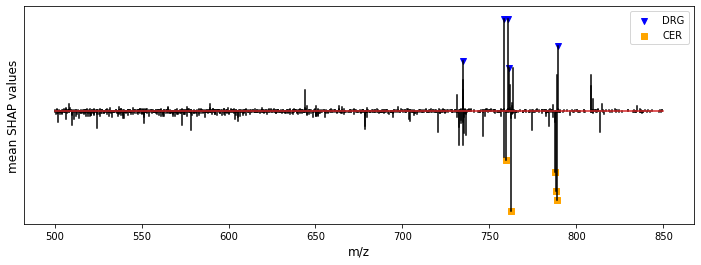

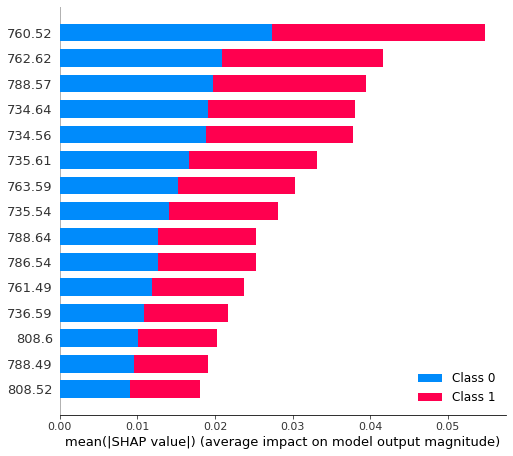

In [5]:
X_df = pd.DataFrame(data)
X_df.columns = features
fig1,fig2,contrib_rf = feature_contrib(rf_model,X_df,features,5,True)

In [29]:
fig1.savefig('plot/contribution_plot_SIMS_2.svg')
#fig2.savefig('plot/shap_plot_SIMS.svg')

In [13]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator

def shap_clustering(shap_vals,groups):
    
    shap_pca50 = PCA(n_components=12).fit_transform(shap_vals)
    #shap_embedded = TSNE(n_components=2, perplexity=25).fit_transform(shap_vals)
    
    cdict1 = {
        'red': ((0.0, 0.11764705882352941, 0.11764705882352941),
                (1.0, 0.9607843137254902, 0.9607843137254902)),

        'green': ((0.0, 0.5333333333333333, 0.5333333333333333),
                  (1.0, 0.15294117647058825, 0.15294117647058825)),

        'blue': ((0.0, 0.8980392156862745, 0.8980392156862745),
                 (1.0, 0.3411764705882353, 0.3411764705882353)),

        'alpha': ((0.0, 1, 1),
                  (0.5, 1, 1),
                  (1.0, 1, 1))
    }  # #1E88E5 -> #ff0052
    red_blue_solid = LinearSegmentedColormap('RedBlue', cdict1)
    
    shap_embedded_df = pd.DataFrame(shap_pca50)
    shap_embedded_df['type'] = groups

    f1,axes= subplots(1,1,figsize=(5,4))
    g = sns.scatterplot(x=0,y=1,hue='type',data=shap_embedded_df,ax=axes)
    g.legend(loc='upper right')
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.get_yaxis().set_ticks([])
    axes.get_xaxis().set_ticks([])
    axes.set_xlabel('PC1',fontsize=12)
    axes.set_ylabel('PC2',fontsize=12)
    
    f2,axes= subplots(1,1,figsize=(6,4))
    plt.scatter(shap_pca50[:,0],
           shap_pca50[:,1],
           c=shap_vals.sum(1).astype(np.float64),
           linewidth=0, alpha=0.9, cmap=red_blue_solid)
    cb = plt.colorbar(label="Log odds of being DRG or CER", aspect=40, orientation="vertical")
    cb.set_alpha(1)
    cb.draw_all()
    cb.outline.set_linewidth(0)
    cb.ax.tick_params('x', length=0)
    cb.ax.xaxis.set_ticks_position("top")
    cb.ax.xaxis.set_label_position('bottom')
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.get_yaxis().set_ticks([])
    axes.get_xaxis().set_ticks([])
    axes.set_xlabel('PC1',fontsize=12)
    axes.set_ylabel('PC2',fontsize=12)
    plt.show()
    return f1,f2,shap_pca50

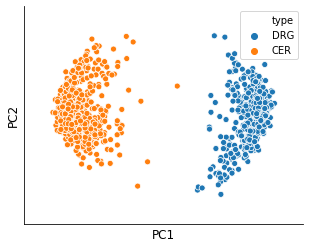

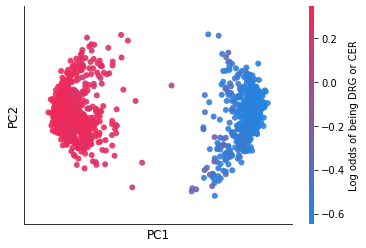

In [14]:
f1,f2,shap_pca = shap_clustering(contrib_rf[0],labels)

In [15]:
f1.savefig('plot/pca_SHAP_SIMS.svg')
f2.savefig('plot/pca_SHAP_prob_SIMS.svg')

In [16]:
def plot_shap_features(shap_vals,X,FOI):
    
    shap_pca = PCA(n_components=12).fit_transform(shap_vals)
    cdict1 = {
    'red': ((0.0, 0.11764705882352941, 0.11764705882352941),
            (1.0, 0.9607843137254902, 0.9607843137254902)),

    'green': ((0.0, 0.5333333333333333, 0.5333333333333333),
              (1.0, 0.15294117647058825, 0.15294117647058825)),

    'blue': ((0.0, 0.8980392156862745, 0.8980392156862745),
             (1.0, 0.3411764705882353, 0.3411764705882353)),

    'alpha': ((0.0, 1, 1),
              (0.5, 1, 1),
              (1.0, 1, 1))
    }  # #1E88E5 -> #ff0052
    red_blue_solid = LinearSegmentedColormap('RedBlue', cdict1)
    row_plot = int(np.ceil(len(FOI)/3))
    f,axes = subplots(3,row_plot,figsize=(row_plot*5,10))
    ax = axes.ravel()
    index = 0
    for feature in FOI:
        fig=ax[index].scatter(shap_pca[:,0],
                   shap_pca[:,1],
                   c=X[feature].values[:10000].astype(np.float64),
                   linewidth=0, alpha=0.75, cmap=red_blue_solid)
        cb=plt.colorbar(fig, aspect=40, orientation="vertical",ax=ax[index])
        cb.set_alpha(1)
        cb.set_label(label='normalized intensity',size=10)
        cb.draw_all()
        cb.outline.set_linewidth(0)
        cb.ax.tick_params('x', length=0)
        cb.ax.xaxis.set_label_position('top')
        ax[index].set_title(format(float(feature),'.2f')+' m/z',fontsize=12)
        ax[index].axis("off")
        index += 1
    return f

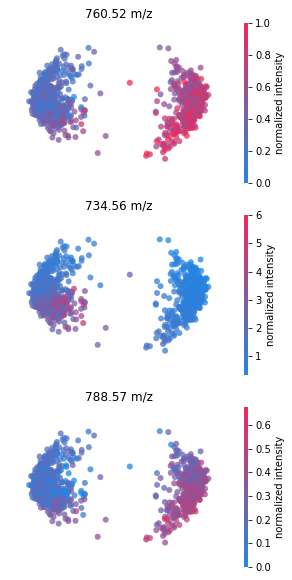

In [17]:
f=plot_shap_features(contrib_rf[0],X_df,[760.52,734.56,788.57])

In [18]:
f.savefig('plot/SHAP_features_SIMS.svg')